In [ ]:
import keras

In [ ]:
from keras.datasets import mnist

In [ ]:
data = mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
len(train_images)

60000

In [ ]:
len(train_labels)

60000

In [ ]:
len(test_images)

10000

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))

In [ ]:
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
train_images = train_images.astype('float')/255 #normalization

In [ ]:
test_images = test_images.astype('float')/255 #normalization

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

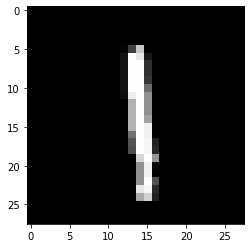

In [ ]:
plt.imshow(image.array_to_img(train_images[8]), cmap="gray")

In [ ]:
train_labels[8]

1

In [ ]:
from keras.utils import to_categorical
train_labels_original = train_labels
train_labels = to_categorical(train_labels)

In [ ]:
train_labels[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
test_labels_original = test_labels
test_labels = to_categorical(test_labels)

In [ ]:
test_labels_original[7]

9

In [ ]:
test_labels[7]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
from keras import layers, models

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.MaxPooling2D((2,2)))

In [ ]:
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.MaxPooling2D((2,2)))

In [ ]:
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
____________________________________________________

In [ ]:
model.add(layers.Dense(64, activation = 'relu'))

In [ ]:
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs = 100, batch_size=64)

Epoch 1/100
938/938 [==============================] - 49s 53ms/step - loss: 0.1731 - accuracy: 0.9461
Epoch 2/100
938/938 [==============================] - 50s 54ms/step - loss: 0.0488 - accuracy: 0.9847
Epoch 3/100
938/938 [==============================] - 50s 53ms/step - loss: 0.0337 - accuracy: 0.9895
Epoch 4/100
938/938 [==============================] - 49s 53ms/step - loss: 0.0260 - accuracy: 0.9918
Epoch 5/100
938/938 [==============================] - 49s 53ms/step - loss: 0.0197 - accuracy: 0.9941
Epoch 6/100
938/938 [==============================] - 49s 52ms/step - loss: 0.0160 - accuracy: 0.9951
Epoch 7/100
938/938 [==============================] - 49s 52ms/step - loss: 0.0132 - accuracy: 0.9958
Epoch 8/100
938/938 [==============================] - 49s 53ms/step - loss: 0.0107 - accuracy: 0.9966
Epoch 9/100
938/938 [==============================] - 50s 53ms/step - loss: 0.0098 - accuracy: 0.9969
Epoch 10/100
938/938 [==============================] - 49s 52ms/step - l

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.1810 - accuracy: 0.9940


In [ ]:
test_accuracy

0.9940000176429749

In [ ]:
predictions = model.predict_classes(test_images)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


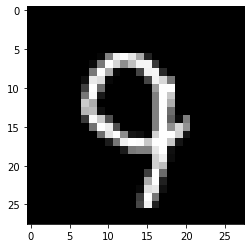

In [ ]:
plt.imshow(image.array_to_img(test_images[999]), cmap="gray")

In [ ]:
predictions[999]

9

In [ ]:
img = image.load_img(path="/content/IMG_DA871CC1A547-1.jpeg", grayscale=True, target_size=(28,28,1))
img = image.img_to_array(img)
plt.imshow(image.array_to_img(img), cmap="gray")
img = img.astype('float')/255
test_img = img.reshape((1, 28, 28, 1))
img_class = model.predict_classes(test_img)
prediction = img_class[0]

In [ ]:
prediction